In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#读取数据
#添加“header=None”，告诉函数原始文件数据没有列索引，让read_csv为自动加上列索引
data = pd.read_csv( 'ex1data1.txt', header=None, names=['Population', 'Profit'])

In [3]:
#查看读取的数据
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


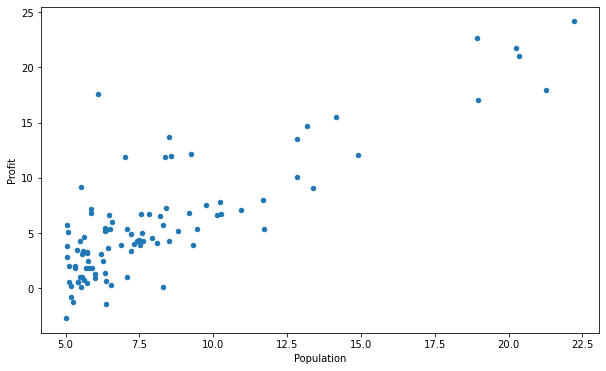

In [9]:
#绘制数据点图，大小10*6 inch
data.plot(kind='scatter', x='Population', y='Profit', figsize=(10,6))

In [10]:
#在训练集中添加一列全为1（第0列，命名为Ones），以便向量化计算
data.insert(0, 'Ones', 1)

In [12]:
#查看效果
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [13]:
#初始化数据X、y
#‘:’表示所有行,data.shape[1]是表第一行的维度（即为3）
X = data.iloc[:,0:data.shape[1]-1]#X为原表去掉最后一列
y = data.iloc[:,data.shape[1]-1:data.shape[1]]#y是原表最后一列

In [14]:
X

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [15]:
y

,Profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [16]:
#将X、y转化为矩阵
X = np.matrix(X.values)
y = np.matrix(y.values)

In [17]:
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [20]:
y

matrix([[17.592  ],
        [ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],


In [21]:
#初始化𝜃，全为0的1*2矩阵
theta = np.matrix(np.array([0,0]))

In [22]:
theta

matrix([[0, 0]])

In [23]:
#查看当前X、y、𝜃的维度
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [24]:
#定义代价函数
def computeCost(X, y, theta):
    return np.sum(np.power(((X * theta.T) - y), 2)) / (2 * len(X))#即为𝐽(𝜃)向量计算表达式

In [25]:
#查看初始代价
computeCost(X, y, theta)

32.072733877455676

批量梯度下降（batch gradient decent）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [31]:
#定义批量梯度下降算法
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))#[0,1]
    parameters = int(theta.ravel().shape[1])#0,1
    cost = np.zeros(iters)#[0 0 0 ... 0]
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [32]:
#初始化学习率α和迭代次数iters
alpha = 0.01
iters = 1000

In [33]:
t, cost = gradientDescent(X, y, theta, alpha, iters)

In [35]:
t

matrix([[-3.24140214,  1.1272942 ]])

In [36]:
computeCost(X, y, t)

4.515955503078912

代价函数值由初始32.072733877455676下降到4.515955503078912

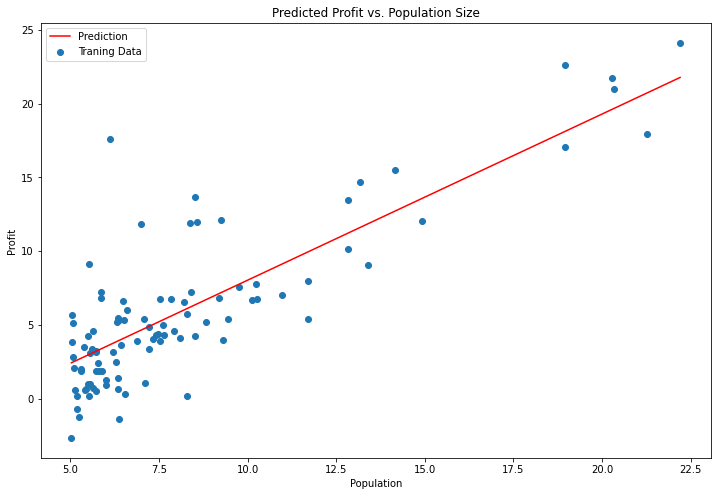

In [38]:
#查看拟合程度
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = t[0, 0] + (t[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()